## Import the Dependencies

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
import warnings
warnings.filterwarnings('ignore')


### Data collection & Preprocessing

In [3]:
data = pd.read_csv("spam.csv", encoding="latin-1")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
print("Number of rows :", data.shape[0], "\nNumber of columns:", data.shape[1])

Number of rows : 5572 
Number of columns: 5


## Data Cleaning

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# Drop unused columns & Rename the used columns 

data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
data.rename(columns={'v1':'target','v2':'text'},inplace=True)
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Label Encoding

In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

data['target'] = encoder.fit_transform(data['target'])
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# Missing Values

data.isnull().sum()

target    0
text      0
dtype: int64

In [9]:
# Check for Duplicate Values

data.duplicated().sum()
data = data.drop_duplicates(keep='first')
data.duplicated().sum()

0

## Exploratory Data Analysis

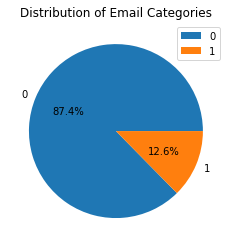

0    4516
1     653
Name: target, dtype: int64

In [10]:
# Get the value counts for the Category column

value_counts = data['target'].value_counts()

# Create a pie chart
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')

# Add a title and a legend
plt.title('Distribution of Email Categories')
plt.legend(labels=value_counts.index)

# Show the plot
plt.show()
data['target'].value_counts()

In [11]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nikhil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
# Creating Number of Charater column

data['num_characters'] = data['text'].apply(len)

# Creating Number of Words column

data['num_words'] = data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

# Creating Number of Sentence column

data['num_sentences'] = data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

data.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [13]:
# Compare ham and Spam description

data[data['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [14]:
data[data['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


<Axes: xlabel='num_characters', ylabel='Count'>

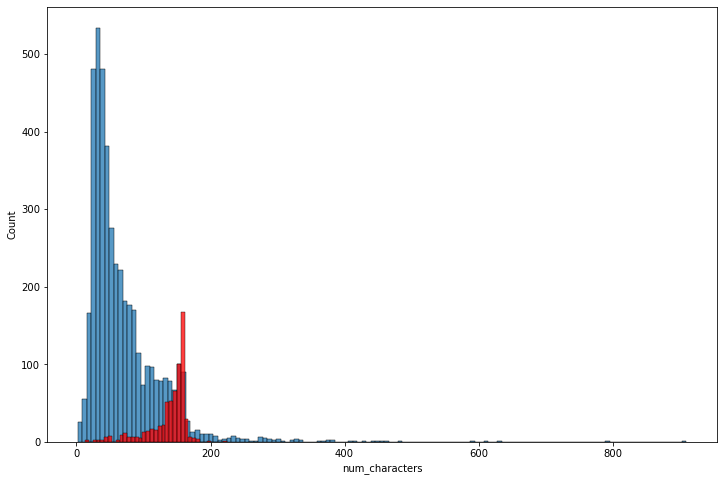

In [15]:
plt.figure(figsize=(12,8))
sns.histplot(data[data['target'] == 0]['num_characters'])
sns.histplot(data[data['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

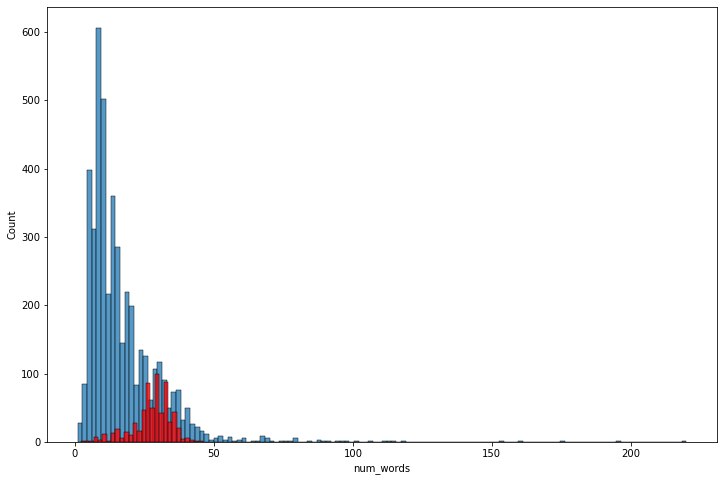

In [16]:
plt.figure(figsize=(12,8))
sns.histplot(data[data['target'] == 0]['num_words'])
sns.histplot(data[data['target'] == 1]['num_words'],color='red')

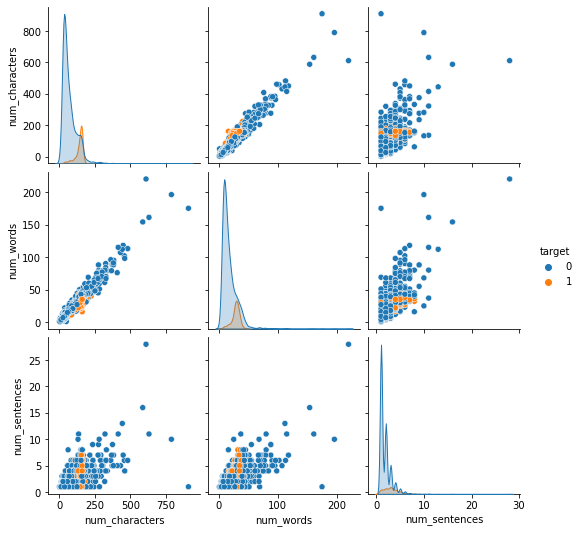

In [17]:
# Pairplot

sns.pairplot(data,hue='target')

<Axes: >

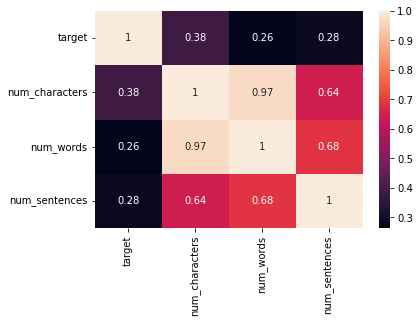

In [18]:
sns.heatmap(data.corr(),annot=True)

## Data Perprocessing

In [19]:
import string
from wordcloud import WordCloud
from collections import Counter
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
stopwords = nltk.corpus.stopwords.words('english')


In [20]:
def transform_text(text):
    text = text.lower()
    text = text.split()
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)


In [21]:
data['transformed_text'] = data['text'].apply(transform_text)

In [22]:
data.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong avail bugi n great world la e cine g...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok joke wif u
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli u c alreadi
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe live around though


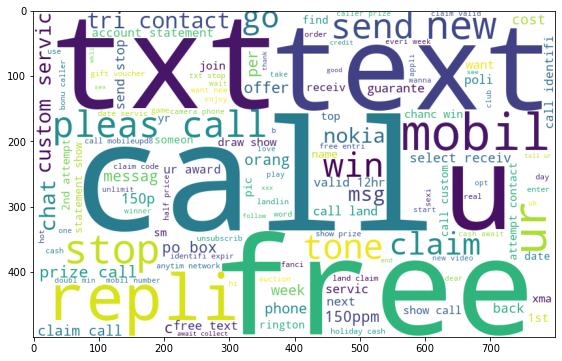

In [23]:
# Creating WordCloud Generator

wc = WordCloud(width=800,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(data[data['target'] == 1]['transformed_text'].str.cat(sep=" "))

plt.figure(figsize=(15,6))
plt.imshow(spam_wc)                     

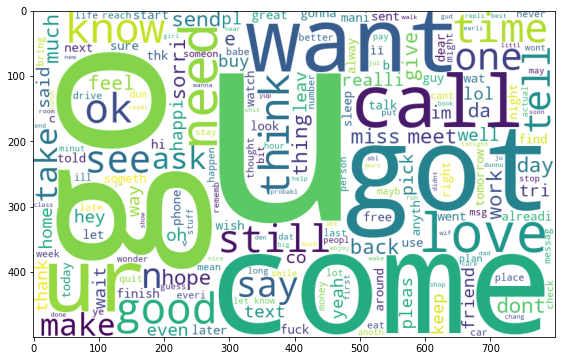

In [24]:
ham_wc = wc.generate(data[data['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [25]:
spam_corpus=[]
for msg in data[data['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

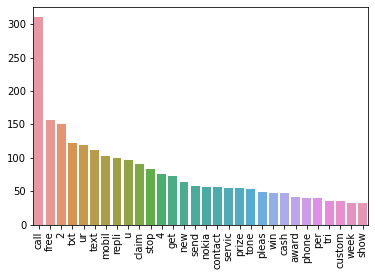

In [26]:
spam_count = Counter(spam_corpus).most_common(30)
sns.barplot(x=[item[0] for item in spam_count], y=[item[1] for item in spam_count])
plt.xticks(rotation='vertical')
plt.show()

In [27]:
ham_corpus=[]
for msg in data[data['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)    

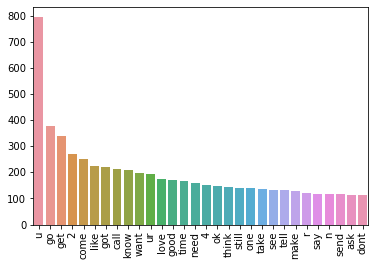

In [28]:
ham_count = Counter(ham_corpus).most_common(30)
sns.barplot(x=[item[0] for item in ham_count], y=[item[1] for item in ham_count])
plt.xticks(rotation='vertical')
plt.show()

## Text to Vectorization

### Model Building

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

X = tfidf.fit_transform(data['transformed_text']).toarray()

In [30]:
# Scaling the range from 0 - 1

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [31]:
# appending the num_character col to X

X = np.hstack((X,data['num_characters'].values.reshape(-1,1)))
X.shape

(5169, 3001)

In [32]:
y = data['target'].values

## Spliting the data into Train and Test data

In [33]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

### Naive Bayes

In [34]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [35]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8075435203094777
[[717 179]
 [ 20 118]]
0.39730639730639733


In [36]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9613152804642167
[[890   6]
 [ 34 104]]
0.9454545454545454


In [37]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9758220502901354
[[894   2]
 [ 23 115]]
0.9829059829059829


### After Observation it looks like TfidfVectorizer & MultinomialNB gives good Precision 

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [39]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [40]:
clfs = { 'SVC' : svc,
         'KN' : knc, 
         'NB': mnb, 
         'DT': dtc, 
         'LR': lrc, 
         'RF': rfc, 
         'AdaBoost': abc, 
         'BgC': bc, 
         'ETC': etc,
         'GBDT':gbdt,
         'xgb':xgb }

In [41]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

train_classifier(svc,X_train,y_train,X_test,y_test)

(0.8665377176015474, 0.0)

In [42]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.8665377176015474
Precision -  0.0
For  KN
Accuracy -  0.8897485493230174
Precision -  1.0
For  NB
Accuracy -  0.9613152804642167
Precision -  0.9454545454545454
For  DT
Accuracy -  0.9458413926499033
Precision -  0.8796296296296297
For  LR
Accuracy -  0.9680851063829787
Precision -  0.9411764705882353
For  RF
Accuracy -  0.9700193423597679
Precision -  0.9819819819819819
For  AdaBoost
Accuracy -  0.9584139264990329
Precision -  0.8991596638655462
For  BgC
Accuracy -  0.9632495164410058
Precision -  0.9032258064516129
For  ETC
Accuracy -  0.97678916827853
Precision -  0.9830508474576272
For  GBDT
Accuracy -  0.9535783365570599
Precision -  0.9411764705882353
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9482758620689655


In [43]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df               

,Algorithm,Accuracy,Precision
1,KN,0.889749,1.000000
8,ETC,0.976789,0.983051
5,RF,0.970019,0.981982
10,xgb,0.967118,0.948276
2,NB,0.961315,0.945455
4,LR,0.968085,0.941176
9,GBDT,0.953578,0.941176
7,BgC,0.963250,0.903226
6,AdaBoost,0.958414,0.899160
3,DT,0.945841,0.879630


In [44]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.889749
1,ETC,Accuracy,0.976789
2,RF,Accuracy,0.970019
3,xgb,Accuracy,0.967118
4,NB,Accuracy,0.961315
5,LR,Accuracy,0.968085
6,GBDT,Accuracy,0.953578
7,BgC,Accuracy,0.963250
8,AdaBoost,Accuracy,0.958414
9,DT,Accuracy,0.945841


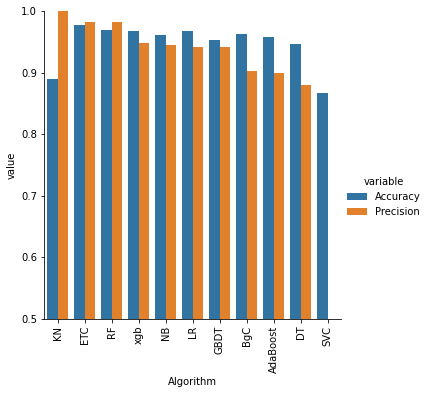

In [45]:
sns.catplot(x = 'Algorithm', y='value', hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()


In [46]:
# Change the max_features parameter of TfIdf

temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df_scaled = new_df.merge(temp_df,on='Algorithm')
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.889749,1.000000,0.889749,1.000000,0.889749,1.000000,0.889749,1.000000
1,ETC,0.976789,0.983051,0.976789,0.983051,0.976789,0.983051,0.976789,0.983051
2,RF,0.970019,0.981982,0.970019,0.981982,0.970019,0.981982,0.970019,0.981982
3,xgb,0.967118,0.948276,0.967118,0.948276,0.967118,0.948276,0.967118,0.948276
4,NB,0.961315,0.945455,0.961315,0.945455,0.961315,0.945455,0.961315,0.945455
5,LR,0.968085,0.941176,0.968085,0.941176,0.968085,0.941176,0.968085,0.941176
6,GBDT,0.953578,0.941176,0.953578,0.941176,0.953578,0.941176,0.953578,0.941176
7,BgC,0.963250,0.903226,0.963250,0.903226,0.963250,0.903226,0.963250,0.903226
8,AdaBoost,0.958414,0.899160,0.958414,0.899160,0.958414,0.899160,0.958414,0.899160
9,DT,0.945841,0.879630,0.945841,0.879630,0.945841,0.879630,0.945841,0.879630


In [47]:
# Voting Classifier

svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [48]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9632495164410058
Precision 1.0


In [49]:
# Applying stacking

estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [50]:
from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9680851063829787
Precision 0.8947368421052632


In [51]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))
 